In [2]:
%cd /content/drive/MyDrive/multi/0427

/content/drive/MyDrive/multi/0427


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [6]:
wine = load_wine()
wine_std = StandardScaler().fit_transform(wine.data)
pca = PCA(n_components=2)
wine_pca = pca.fit_transform(wine_std)

In [7]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=2022)
km.fit(wine_std)

KMeans(n_clusters=3, random_state=2022)

In [8]:
df = pd.DataFrame(
    {'PC1': wine_pca[:,0], 'PC2':wine_pca[:,1],
     'target':wine.target, 'cluster':km.labels_}
)
df.head()

,PC1,PC2,target,cluster
0,3.316751,-1.443463,0,2
1,2.209465,0.333393,0,2
2,2.516740,-1.031151,0,2
3,3.757066,-2.756372,0,2
4,1.008908,-0.869831,0,2


- 데이터 시각화

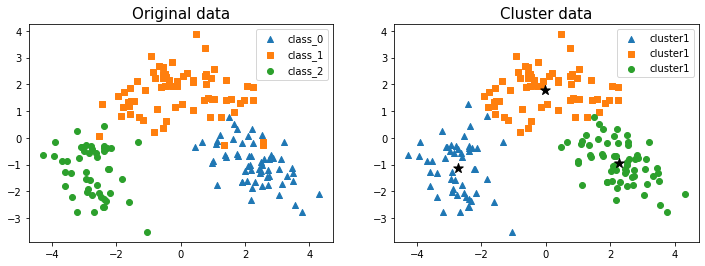

In [12]:
plt.figure(figsize=(12,4))
markers = ['^','s','o']

for i, column in enumerate(['target', 'cluster']):
    plt.subplot(1,2,i+1)
    for j, marker in enumerate(markers):
        x_data = df[df[column]==j]['PC1']
        y_data = df[df[column]==j]['PC2']
        if i == 0:
            plt.title('Original data', fontsize=15)
            plt.scatter(x_data, y_data, marker=marker, label=wine.target_names[j])
        else:
            plt.title('Cluster data', fontsize=15)
            plt.scatter(x_data, y_data, marker=marker, label='cluster'+str(i))
            plt.scatter(x_data.mean(), y_data.mean(), marker='*', c='black', s=100)

    plt.legend()
plt.show()